In [19]:
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score #, LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

(768, 8)
(768,)
LR: 0.772(0.050)
LDA: 0.767(0.048)
KNN: 0.711(0.051)
CART: 0.693(0.049)
SVM: 0.760(0.035)
NB: 0.759(0.039)


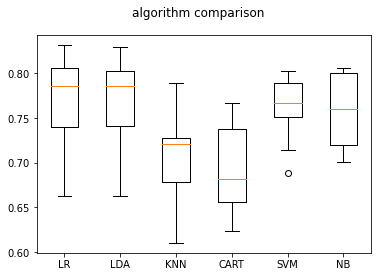

In [20]:
filename ='/Users/wangjiabin/ML_2020_summer/<ml with python practice>/cha_7_data_visibility/pima_data.csv'
columns =['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
dataset = read_csv(filename)
array = dataset.values
#print(array.shape)
X = array[:,0:8]
Y = array[:,8]
print(X.shape)
print(Y.shape)
num_folds = 10
seed =7
kfold = KFold(n_splits =num_folds,shuffle =True, random_state =seed)
models = {}
models['LR'] = LogisticRegression(solver='lbfgs',max_iter=999)
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['SVM'] = SVC()
models['NB'] = GaussianNB()
results = []
for name in models:
    result = cross_val_score(models[name],X,Y,cv =kfold)
    results.append(result)
    vals = '%s: %.3f(%.3f)'%(name, result.mean(),result.std())
    print(vals)
fig = pyplot.figure()
fig.suptitle('algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()